In [1]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
from utils import fetch_dataset

In [2]:
class Graph():
    def __init__(self, g, node_color_map, with_node_labels, with_egde_labels):
        self.graph = nx.Graph()
        self.node_color_map = node_color_map
        self.with_node_labels = with_node_labels
        self.with_egde_labels = with_egde_labels
        # add nodes and labels, if labels are available
        if self.with_node_labels:
            for i in g[1].items():
                self.graph.add_node(i[0], label=i[1])

        if self.with_egde_labels:
        # add edges and labels, if labels are available
            for i in g[2].items():
                self.graph.add_edge(i[0][0], i[0][1], type=i[1])
        else:
            for i in g[0]:
                self.graph.add_edge(i[0], i[1])

    def plot(self, with_labels=False):
        if len(self.node_color_map) == 0:
            node_color = "gray"
            
        else:
            node_color = [self.node_color_map[label[1]] for label in self.graph.nodes(data="label")]

        if self.with_egde_labels:
            # +1 for edge width, because edge width 0 is not visible
            edge_width = [self.graph[u][v]["type"] + 1 for u, v in self.graph.edges()]
            
        else:
            edge_width = 1

        plt.figure(figsize=(5, 5))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos=pos, node_color=node_color, with_labels=with_labels, node_size=80, width=edge_width, edge_color="gray")
        plt.show()

In [3]:
class Dataset():
    def __init__(self, name):
        self.name = name
        self.with_node_labels = True
        self.with_edge_labels = True
        self.dataset = fetch_dataset(self.name, verbose=False)
        self.G, self.y = self.dataset.data, self.dataset.target

        # Some datasets have no node labels, e.g. FRANKENSTEIN
        try:
            assert len(self.G[0][1]) != 0
            self.nodes = [node for g in self.G for node in g[1].items()]
            self.node_labels = list(set(label for g in self.G for label in g[1].values()))
            node_cmap = plt.get_cmap("tab20")
            self.node_color_map = {self.node_labels[index]: node_cmap.colors[index] for index in range(len(self.node_labels))}

        except AssertionError:
            self.nodes = list(set([node for g in self.G for edge in g[0] for node in edge]))
            self.with_node_labels = False
            self.node_color_map = {}
            print("{} nodes have no labels.".format(name))
        

        # Some datasets have no edge labels, e.g. BZR
        try:
            assert len(self.G[0][2]) != 0
            self.edges = [edge for g in self.G for edge in g[2].items()]
            self.edge_labels = list(set(label for g in self.G for label in g[2].values()))

        except AssertionError:
            self.edges = [edge for g in self.G for edge in g[0]]
            self.with_edge_labels = False
            print("{} edges have no labels.".format(name))

        self.graphs = [Graph(g, self.node_color_map, self.with_node_labels, self.with_edge_labels) for g in self.G]

    def plot_dataset(self):
        nx_G = nx.Graph()

        if self.with_node_labels:
            for node in self.nodes:
                nx_G.add_node(node[0], label=node[1])
                self_node_color = [self.node_color_map[label[1]] for label in nx_G.nodes(data="label")]

        else:
            for node in self.nodes:
                nx_G.add_node(node)
                self_node_color = "gray"

        if self.with_edge_labels:
            for edge in self.edges:
                nx_G.add_edge(edge[0][0], edge[0][1], type=edge[1])
                self.edge_width = [nx_G[u][v]["type"] + 1 for u, v in nx_G.edges()]

        else:
            for edge in self.edges:
                nx_G.add_edge(edge[0], edge[1])
                self.edge_width = 1

        plt.figure(figsize=(50, 30))
        pos = nx.spring_layout(nx_G)
        nx.draw(nx_G, pos=pos, node_color=self_node_color, with_labels=False, node_size=100, width=self.edge_width, edge_color="gray")

    def plot_class_distribution(self):
        fig, ax = plt.subplots(figsize=(6, 5))
        counter = Counter(self.y)
        bars = ax.bar(counter.keys(), counter.values(), width=0.4)
        for bars in ax.containers:
            # make the numbers on bars away from the bars
            ax.bar_label(bars, padding=3)

        # give each bar a different color, using colormap
        cmap = plt.get_cmap("tab20")
        for i, bar in enumerate(bars):
            bar.set_color(cmap(i))

        # make the y-axis larger to show the numbers on bars
        ax.margins(y=0.1)
        ax.set_xlabel("Class")
        ax.set_ylabel("Number of samples")
        ax.set_title(self.name + " dataset")
        plt.show()

In [4]:
MUTAG = Dataset("MUTAG")

In [5]:
MUTAG.graphs[0].graph.nodes(data="label")

NodeDataView({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 1, 16: 2, 17: 2}, data='label')

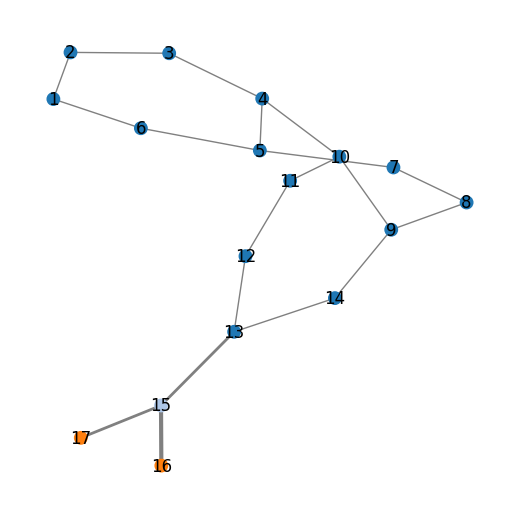

In [6]:
MUTAG.graphs[0].plot(True)

In [7]:
# use networkx to count how many graphlets are in the graph, for example, how many triangles

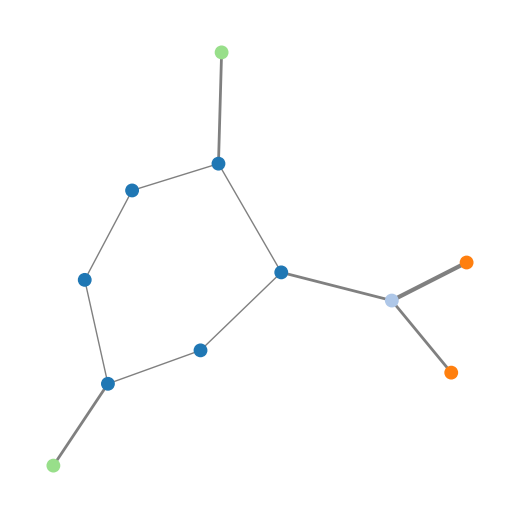

In [8]:
MUTAG.graphs[143].plot()

In [9]:
for i in nx.all_pairs_dijkstra_path_length(MUTAG.graphs[0].graph):
    print(i)

(1, {1: 0, 2: 1, 6: 1, 3: 2, 5: 2, 4: 3, 7: 3, 10: 4, 8: 4, 9: 5, 11: 5, 14: 6, 12: 6, 13: 7, 15: 8, 16: 9, 17: 9})
(2, {2: 0, 1: 1, 3: 1, 6: 2, 4: 2, 5: 3, 10: 3, 7: 4, 9: 4, 11: 4, 8: 5, 14: 5, 12: 5, 13: 6, 15: 7, 16: 8, 17: 8})
(3, {3: 0, 2: 1, 4: 1, 1: 2, 5: 2, 10: 2, 6: 3, 7: 3, 9: 3, 11: 3, 8: 4, 14: 4, 12: 4, 13: 5, 15: 6, 16: 7, 17: 7})
(4, {4: 0, 3: 1, 5: 1, 10: 1, 2: 2, 6: 2, 7: 2, 9: 2, 11: 2, 1: 3, 8: 3, 14: 3, 12: 3, 13: 4, 15: 5, 16: 6, 17: 6})
(5, {5: 0, 4: 1, 6: 1, 7: 1, 3: 2, 10: 2, 1: 2, 8: 2, 2: 3, 9: 3, 11: 3, 14: 4, 12: 4, 13: 5, 15: 6, 16: 7, 17: 7})
(6, {6: 0, 5: 1, 1: 1, 4: 2, 7: 2, 2: 2, 3: 3, 10: 3, 8: 3, 9: 4, 11: 4, 14: 5, 12: 5, 13: 6, 15: 7, 16: 8, 17: 8})
(7, {7: 0, 5: 1, 8: 1, 4: 2, 6: 2, 9: 2, 3: 3, 10: 3, 1: 3, 14: 3, 2: 4, 11: 4, 13: 4, 12: 5, 15: 5, 16: 6, 17: 6})
(8, {8: 0, 7: 1, 9: 1, 5: 2, 10: 2, 14: 2, 4: 3, 6: 3, 11: 3, 13: 3, 3: 4, 1: 4, 12: 4, 15: 4, 2: 5, 16: 5, 17: 5})
(9, {9: 0, 8: 1, 10: 1, 14: 1, 7: 2, 4: 2, 11: 2, 13: 2, 5: 3, 3: 3, 12: